In [2]:
import numpy as np  
import pandas as pd  # для работы с таблицами
from scipy import stats # При работе со статистикой
import scipy.stats as t
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 
import statsmodels.stats.api as sms

### Задание  0

<div class="alert alert-info">
Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

### Решение
Уровень доверия равен 95% значит $\alpha$ = 0,05  
По таблице нормального распределения  1 - $\alpha$/2 = 0,975  
Определяем квантиль Z$\alpha$ = 1.96  
Теперь можно найти объем выборки 


In [167]:
n = ((1.06 * (np.sqrt(225))/3)**2)
print(f'Минимальный необходимый объем выборки:{round(n)}')

Минимальный необходимый объем выборки:28


### Задание 1
<div class="alert alert-info">
Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.  
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>



### Решение
Уровень доверия равен 98% значит $\alpha$ = 0,02  
По таблице нормального распределения находим 1 - $\alpha$/2 = 0,99  
Определяем квантиль Z$\alpha$ = 2,33  
Теперь можно найти точность (15 / $\sqrt25$) * 2.33 = 6.99   
Доверительный интервал 98% имеет вид  (130 - 6.99, 130 + 6.99) = 123.01 - 136.99  
L = 13.98

### Задание 2  
<div class="alert alert-info">
Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001
    
    
 - Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`  
    
- Покажите различия визуально  
</div>
<div>

In [3]:
## import scipy.stats as stats

np.random.seed(43)
population_men  = stats.norm.rvs(loc=171, scale=19, size=110000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=165, scale=16, size=12000)  # Выборка женщин со средним ростом 165

### Ваш код...
t , p  = stats.ttest_ind(population_men, population_women)
print("t = " + str(t))
print("p = " + str(p))

t = 33.50977305233272
p = 4.5498924103175065e-245


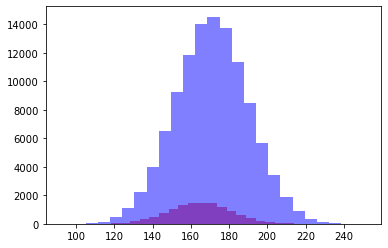

In [4]:
plt.hist(population_women, color='r', alpha=0.5, bins=25); #Выборка population_women
plt.hist(population_men, color='b',  alpha=0.5, bins=25);  #Выборка population_men

<div class="alert alert-info">
Данные выборки пренадлежат к одному распределению. P - стремиться к нулю. Разичие между выборками значительное !
<div>

### Задание 3

<div class="alert alert-info">
Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

$$ n = (\frac{Z*\sigma}{\Delta})^2$$
- $\Delta$ - допустимая ошибка/погрешность, 

- $\sigma$ - стандартное отклонение, 

- Z - квантиль нормального распределения


### Решение 

Уровень доверия равен 95% значит $\alpha$ = 0,05  
По таблице нормального распределения находим 1 - $\alpha$/2 = 0,975  
Определяем квантиль Z$\alpha$ = 1,96  
Теперь можно найти $$ n = ((1.96 * 150) / 50)^2 = 34.57 $$  

Необходимый объем выборки : 35

### Задание 4
<div class="alert alert-info">
Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [142]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


Н0 - Волшебник умеет предсказывать погоду  - 


In [143]:
import scipy.stats as stats
# Учтите, что у тестов, в том чилсле и точного теста Фишера под нелевой гипотезой подразумевается случайность/отсутсвие эффекта

oddsratio, pvalue = stats.fisher_exact(observations)#Возможно пригодится эта функция.
oddsratio, pvalue
### Ваш код...

(0.5811965811965812, 0.35417955365927367)

Под Н0 принимаем, что волшебник умеет предсказывать погоду. p-value значительно выше уровня значимости ,  
что означает, что у нас нет достаточно основний чтобы отвергнуть нулевую гипотезу. 

### Задание 5 
<div class="alert alert-info">
Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [146]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

def mean_confidence_interval(data, confidence=0.95): #Сложный пример реализации. Проще смотри в лекци. 
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h 

mean_confidence_interval(data, 0.90)

(6.074074746111319, 6.628571428571429, 7.183068111031539)


### Задание 6
<div class="alert alert-info">
Принадлежат ли выборки data_1 и data_2 одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [147]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

#Ваш код:

t = 7.35744682757447
p = 2.1159475572725764e-11


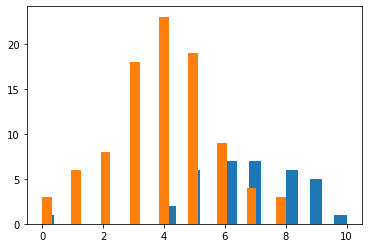

In [150]:
t , p  = stats.ttest_ind(data_1, data_2)
print("t = " + str(t))
print("p = " + str(p))

# Чем больше значение t-score, тем больше группы отличаются
# Значение p-value , меньше 0,05, и, таким образом, мы отклоняем нулевую гипотезу и, таким образом,
# это доказывает, что средние значения двух распределений различны и различие статистически значимо,
# а значит выборки принадлежат к разным множествам . 

plt.hist(data_1, bins=25); #Выборка a
plt.hist(data_2, bins=25);  #Выборка b


### Задание 7
<div class="alert alert-info">

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

### Ваши выводы
Думаю будем считать что распределение нормальное т.к. статистические тесты и p- value  
мы делаем чтобы опровергнуть или принять Нулевую гипотезу. Исходя из принятого уровня значимости a = 0,05 при полученном значении p-value мы отвергаем нулевую гипотезу. 

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [168]:
from scipy import stats
np.random.seed(11)
A = stats.norm.rvs(scale=15,loc=169,size=300)
B = stats.norm.rvs(scale=14,loc=171.4,size=300)

Сформулируем нулевую гипотезу  - Эффективность препарата А выше чем эффективность препарата В   
Соответственно альтернативная гипотеза  - Эффективность препарата А ниже чем препарата В  
Значение уровня значимости принимаем 0,05 - 5%  

In [165]:
stats.ttest_ind(A, B, equal_var = True) # Критерий Уэлча 

Ttest_indResult(statistic=-1.95300880485141, pvalue=0.051284593140469285)

Мы получили p-value большее уровня значимости. Значит отвергаем нулевую гипотезу . Различия не значительны Т.е. эффективность перпарата А не выше препарата В. Построим гистограммы  и увидим что действительно различия минимальны.  
Чтобы различия были значимы P-value быть = или меньше 0,5

(array([ 2.,  0.,  1.,  0.,  0.,  0.,  3.,  2.,  2.,  3.,  3.,  6.,  1.,
         6.,  2., 10.,  5.,  8.,  6.,  9., 12.,  5., 14., 10.,  9., 16.,
        13., 11., 14., 11., 11., 10., 10.,  8., 14.,  4.,  8.,  3.,  6.,
         5.,  6.,  2.,  3., 13.,  3.,  4.,  3.,  1.,  0.,  2.]),
 array([129.20022161, 130.65677407, 132.11332653, 133.569879  ,
        135.02643146, 136.48298392, 137.93953638, 139.39608884,
        140.85264131, 142.30919377, 143.76574623, 145.22229869,
        146.67885115, 148.13540362, 149.59195608, 151.04850854,
        152.505061  , 153.96161346, 155.41816593, 156.87471839,
        158.33127085, 159.78782331, 161.24437577, 162.70092824,
        164.1574807 , 165.61403316, 167.07058562, 168.52713808,
        169.98369054, 171.44024301, 172.89679547, 174.35334793,
        175.80990039, 177.26645285, 178.72300532, 180.17955778,
        181.63611024, 183.0926627 , 184.54921516, 186.00576763,
        187.46232009, 188.91887255, 190.37542501, 191.83197747,
        193.

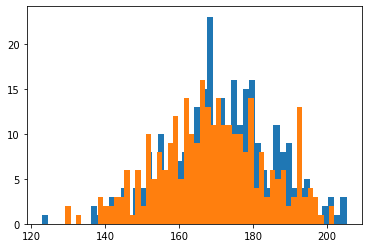

In [166]:
plt.hist(B, bins=50)
plt.hist(A, bins=50)
